# CHURN

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_ = pd.read_csv('/Users/yelizsari/Downloads/VBO/VBO - Week 2/churn2.csv')

In [3]:
df = df_.copy()

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.drop(['RowNumber', 'Surname'], axis=1, inplace=True)

In [6]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# numeric varibles: CreditScore, Age, Balance, EstimatedSalary
# categoric variables: Geography, Gender
# cardinal variables: Tenure, NumOfProducts, HasCrCard, IsActiveMember

# Data Understanding

### 1 - CreditScore

In [8]:
df.groupby('Exited').agg({'CreditScore':['min', 'max', 'count','mean', 'std', lambda x: x.std()/x.mean()]}).round(3)

CreditScore                                        
               min  max count     mean      std <lambda_0>
Exited                                                    
0              405  850  7963  651.853   95.654      0.147
1              350  850  2037  645.351  100.322      0.155

In this table, the standart deviation to mean ratios are both not significant. Churn ratio is lower than not churn. Additionally, nearly 80 percent of the dataset did not churn.

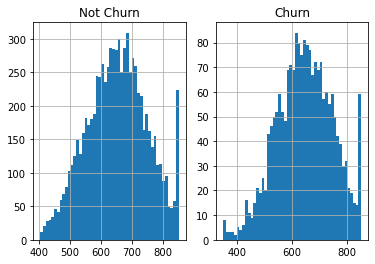

In [9]:
fig, axes = plt.subplots(1,2)
df[df['Exited']==0]['CreditScore'].hist(bins=50, ax=axes[0])
axes[0].set_title('Not Churn')
df[df['Exited']==1]['CreditScore'].hist(bins=50, ax=axes[1])
axes[1].set_title('Churn')
plt.show()

In these plots, we do not see a significant change on distrubitions according the the churn.

### 2 - Age

In [10]:
df.groupby('Exited').agg({'Age':['min', 'max','mean', 'std', lambda x: x.std()/x.mean()]}).round(3)

Age                               
       min max    mean     std <lambda_0>
Exited                                   
0       18  92  37.408  10.125      0.271
1       18  84  44.838   9.762      0.218

In this table, the standart deviation to mean ratios are both not significant. Churn ratio is lower than not churn.

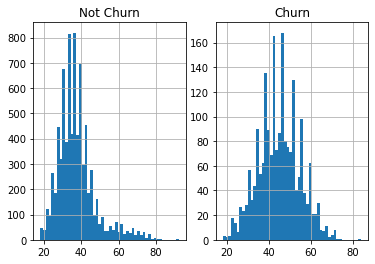

In [11]:
fig, axes = plt.subplots(1,2)
df[df['Exited']==0]['Age'].hist(bins=50, ax=axes[0])
axes[0].set_title('Not Churn')
df[df['Exited']==1]['Age'].hist(bins=50, ax=axes[1])
axes[1].set_title('Churn')
plt.show()

The 'Not Churn' plot is right skewed; therefore, we can say that median is higher than mean. The 'Churn' plot is nearly normal distributed.

### 3 - Balance

In [12]:
df.groupby('Exited').agg({'Balance':['min', 'max', 'mean', 'std', lambda x: x.std()/x.mean()]}).round(3)

Balance                                            
           min        max       mean        std <lambda_0>
Exited                                                    
0          0.0  221532.80  72745.297  62848.041      0.864
1          0.0  250898.09  91108.539  58360.795      0.641

The standard deviation to mean ratio is high for both churn and not churn.

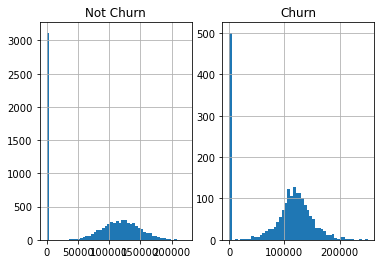

In [13]:
fig, axes = plt.subplots(1,2)
df[df['Exited']==0]['Balance'].hist(bins=50, ax=axes[0])
axes[0].set_title('Not Churn')
df[df['Exited']==1]['Balance'].hist(bins=50, ax=axes[1])
axes[1].set_title('Churn')
plt.show()

There are huge amount of customers who have zero balance. If we seperate them the distributions going to be normal.

In [14]:
# 0=No 1=Yes
def have_balance(x):
    if x < 1:
        return 0
    else:
        return 1
    
df['HaveBalance']= df['Balance'].apply(have_balance)
pd.DataFrame(df.groupby('HaveBalance')['HaveBalance'].count())

,HaveBalance
HaveBalance,
0,3617
1,6383


Nearly 36% of the customers have zero balance.

### 4 - EstimatedSalary

In [15]:
df.groupby('Exited').agg({'EstimatedSalary':['mean', 'std', lambda x: x.std()/x.mean()]}).round(3)

EstimatedSalary                      
                  mean        std <lambda_0>
Exited                                      
0            99738.392  57405.587      0.576
1           101465.678  57912.418      0.571

The standard deviatation to mean ratio is high. This case should be investigated.

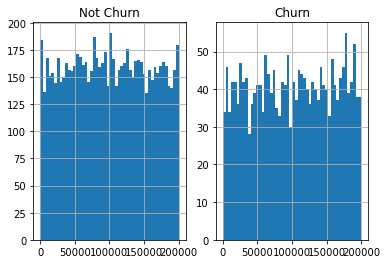

In [16]:
fig, axes = plt.subplots(1,2)
df[df['Exited']==0]['EstimatedSalary'].hist(bins=50, ax=axes[0])
axes[0].set_title('Not Churn')
df[df['Exited']==1]['EstimatedSalary'].hist(bins=50, ax=axes[1])
axes[1].set_title('Churn')
plt.show()

### 5- Geography

In [17]:
df1 = df.groupby(['Geography']).agg({'CustomerId': 'count',
                               'CreditScore': 'mean',
                              'Age': 'mean',
                              'Tenure': 'mean',
                              'Balance': 'mean',
                              'EstimatedSalary': 'mean'})
df2 = df.groupby(["Geography"]).agg({
    "Geography": lambda x: x.count(),
    "Exited" : lambda x: x.sum()
})
df2["Churn Percentage"] = (df2.Exited / df2.Geography)

df2.drop(['Geography', 'Exited'], axis=1, inplace=True)

df3 = df1.merge(df2, left_on='Geography', right_on='Geography', how='inner')
df3.round(2)

,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary,Churn Percentage
Geography,,,,,,,
France,5014,649.67,38.51,5.00,62092.64,99899.18,0.16
Germany,2509,651.45,39.77,5.01,119730.12,101113.44,0.32
Spain,2477,651.33,38.89,5.03,61818.15,99440.57,0.17


The table shows that France has higher number of customers with respect to the other countries. Germany has a higher rate of Churn.

### 6- Gender

In [18]:
df1 = df.groupby(['Gender']).agg({'CustomerId': 'count',
                               'CreditScore': 'mean',
                              'Age': 'mean',
                              'Tenure': 'mean',
                              'Balance': 'mean',
                              'EstimatedSalary': 'mean'})
df2 = df.groupby(["Gender"]).agg({
    "Gender": lambda x: x.count(),
    "Exited" : lambda x: x.sum()
})
df2["Churn Percentage"] = (df2.Exited / df2.Gender)

df2.drop(['Gender', 'Exited'], axis=1, inplace=True)

df3 = df1.merge(df2, left_on='Gender', right_on='Gender', how='inner')
df3.round(2)

,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary,Churn Percentage
Gender,,,,,,,
Female,4543,650.83,39.24,4.97,75659.37,100601.54,0.25
Male,5457,650.28,38.66,5.05,77173.97,99664.58,0.16


The gender ratio is similar; however, women are more likely to churn.

### 7- Tenure

In [19]:
df.groupby('Exited').agg({'Tenure':['min', 'max', 'mean', 'std', lambda x: x.std()/x.mean()]}).round(3)

Tenure                             
          min max   mean    std <lambda_0>
Exited                                    
0           0  10  5.033  2.881      0.572
1           0  10  4.933  2.936      0.595

### 8- NumOfProducts

In [20]:
df1 = df.groupby(['NumOfProducts']).agg({'CustomerId': 'count',
                                         'CreditScore': 'mean',
                              'Age': 'mean',
                              'Tenure': 'mean',
                              'Balance': 'mean',
                              'EstimatedSalary': 'mean'})
df1

,CustomerId,CreditScore,Age,Tenure,Balance,EstimatedSalary
NumOfProducts,,,,,,
1,5084,649.120968,39.673092,4.974626,98551.870614,99487.256851
2,4590,652.188671,37.753595,5.051852,51879.145813,100452.012821
3,266,648.105263,43.195489,5.003759,75458.328195,104318.130564
4,60,653.583333,45.683333,5.300000,93733.135000,104763.723333


The number of customers who have 3 or 4 products are relatively less. They can be grouped together.

### 9- HasCrCard

In [21]:
df1 = df.groupby(['HasCrCard']).agg({'CreditScore': 'mean',
                              'Age': 'mean',
                              'Tenure': 'mean',
                              'Balance': 'mean',
                              'EstimatedSalary': 'mean'})
df2 = df.groupby(["HasCrCard"]).agg({
    "HasCrCard": lambda x: x.count(),
    "Exited" : lambda x: x.sum()
})
df2["Churn Percentage"] = (df2.Exited / df2.HasCrCard)

df2.drop(['HasCrCard', 'Exited'], axis=1, inplace=True)

df3 = df1.merge(df2, left_on='HasCrCard', right_on='HasCrCard', how='inner')
df3.round(2)

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Churn Percentage
HasCrCard,,,,,,
0,651.35,39.11,4.91,77920.79,100974.40,0.21
1,650.19,38.84,5.05,75886.91,99721.16,0.20


Having credit card not affects the churn.

### 10- IsActiveMember

In [22]:
df1 = df.groupby(['IsActiveMember']).agg({'CreditScore': 'mean',
                              'Age': 'mean',
                              'Tenure': 'mean',
                              'Balance': 'mean',
                              'EstimatedSalary': 'mean'})
df2 = df.groupby(["IsActiveMember"]).agg({
    "IsActiveMember": lambda x: x.count(),
    "Exited" : lambda x: x.sum()
})
df2["Churn Percentage"] = (df2.Exited / df2.IsActiveMember)

df2.drop(['IsActiveMember', 'Exited'], axis=1, inplace=True)

df3 = df1.merge(df2, left_on='IsActiveMember', right_on='IsActiveMember', how='inner')
df3.round(2)

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Churn Percentage
IsActiveMember,,,,,,
0,647.97,38.00,5.10,77134.38,100767.20,0.27
1,652.93,39.79,4.93,75875.42,99452.97,0.14


Non- active members are more likely to churn.

# Feature Engineering

In [23]:
df.drop(['CustomerId', 'HaveBalance'], axis=1, inplace=True) 

In [24]:
pd.DataFrame({'NumOfProducts': [4, 3]})
df['NumOfProducts'].replace({4:3}, inplace=True)

In [25]:
def group_balance(x):
    if x == 0:
        return 0
    elif x < 60000:
        return 1
    elif (x>=60000) and (x<120000):
        return 2
    elif (x>=120000) and (x<180000):
        return 3
    else:
        return 4

In [26]:
df['CreditScore_'] = pd.qcut(df['CreditScore'], 5, labels=[1,2,3,4,5])
df['Age_'] = pd.qcut(df['Age'], 5, labels=[1,2,3,4,5])
df['Tenure_'] = pd.qcut(df['Tenure'], 4, labels=[1,2,3,4])
df['Balance_'] = df.Balance.apply(group_balance)
df['EstimatedSalary_'] = pd.qcut(df['EstimatedSalary'], 5, labels=[1,2,3,4,5])

In [27]:
a = ["NumOfProducts", "CreditScore_", "Age_", "Tenure_", "Balance_", "EstimatedSalary_"]

In [28]:
for i in df.columns:
    for j in a:
        if df[i].name == j:
            df[i] = df[i].astype("object")
        else:
            continue

In [29]:
dummies_columns = []
for i in df.columns:
    if df[i].dtypes.name == "object":
        dummies_columns.append(i)
    else:
        continue
        
df_dummies = pd.get_dummies(df, columns = dummies_columns, drop_first = True)
df_dummies.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,...,Tenure__3,Tenure__4,Balance__1,Balance__2,Balance__3,Balance__4,EstimatedSalary__2,EstimatedSalary__3,EstimatedSalary__4,EstimatedSalary__5
0,619,42,2,0.00,1,1,101348.88,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,608,41,1,83807.86,0,1,112542.58,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,502,42,8,159660.80,1,0,113931.57,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,699,39,1,0.00,0,0,93826.63,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,79084.10,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [30]:
import sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
df_dummies[columns_to_scale] = scaler.fit_transform(df_dummies[columns_to_scale])
df_dummies.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,...,Tenure__3,Tenure__4,Balance__1,Balance__2,Balance__3,Balance__4,EstimatedSalary__2,EstimatedSalary__3,EstimatedSalary__4,EstimatedSalary__5
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,0.021886,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.440036,0.198164,-1.387538,0.117350,0,1,0.216534,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,-1.536794,0.293517,1.032908,1.333053,1,0,0.240687,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0.501521,0.007457,-1.387538,-1.225848,0,0,-0.108918,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.063884,0.388871,-1.041760,0.785728,1,1,-0.365276,0,0,1,...,0,0,0,0,1,0,1,0,0,0


# Model

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score

In [33]:
X = df_dummies.drop(["Exited"], axis=1)
y = df_dummies["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,...,Tenure__3,Tenure__4,Balance__1,Balance__2,Balance__3,Balance__4,EstimatedSalary__2,EstimatedSalary__3,EstimatedSalary__4,EstimatedSalary__5
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,0.021886,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.440036,0.198164,-1.387538,0.117350,0,1,0.216534,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,-1.536794,0.293517,1.032908,1.333053,1,0,0.240687,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0.501521,0.007457,-1.387538,-1.225848,0,0,-0.108918,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.063884,0.388871,-1.041760,0.785728,1,1,-0.365276,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [34]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
predict = model.predict(X_test)

In [35]:
confusion_matrix(predict, y_test)

array([[1542,  205],
       [  65,  188]])

In [36]:
print(classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1747
           1       0.48      0.74      0.58       253

    accuracy                           0.86      2000
   macro avg       0.72      0.81      0.75      2000
weighted avg       0.90      0.86      0.88      2000



In [37]:
acc_score = accuracy_score(y_test, predict).round(4)
acc_score

0.865

In [38]:
feat_imp = pd.DataFrame(model.feature_importances_, index=X.columns).sort_values(by=0, ascending=False)
feat_imp

,0
Age,0.358040
NumOfProducts_2,0.166305
NumOfProducts_3,0.154667
IsActiveMember,0.114008
Balance,0.089675
Geography_Germany,0.054647
EstimatedSalary,0.020204
CreditScore,0.017489
Gender_Male,0.013735
Tenure,0.003187


In [39]:
df_dummies.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,...,Tenure__3,Tenure__4,Balance__1,Balance__2,Balance__3,Balance__4,EstimatedSalary__2,EstimatedSalary__3,EstimatedSalary__4,EstimatedSalary__5
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,0.021886,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.440036,0.198164,-1.387538,0.117350,0,1,0.216534,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,-1.536794,0.293517,1.032908,1.333053,1,0,0.240687,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0.501521,0.007457,-1.387538,-1.225848,0,0,-0.108918,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.063884,0.388871,-1.041760,0.785728,1,1,-0.365276,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [40]:
X = df_dummies.drop(['Exited','Age__3','Tenure__2','Tenure__3','Tenure__4','Balance__2','CreditScore__2',
                    'EstimatedSalary__2','CreditScore__3','EstimatedSalary__3','CreditScore__5','Balance__4',
                    'Age__4','Age__2','EstimatedSalary__5'], axis=1)
y = df_dummies[["Exited"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,CreditScore__4,Age__5,Balance__1,Balance__3,EstimatedSalary__4
0,-0.326221,0.293517,-1.041760,-1.225848,1,1,0.021886,0,0,0,0,0,0,0,0,0,0
1,-0.440036,0.198164,-1.387538,0.117350,0,1,0.216534,0,1,0,0,0,0,0,0,0,0
2,-1.536794,0.293517,1.032908,1.333053,1,0,0.240687,0,0,0,0,1,0,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0,0,-0.108918,0,0,0,1,0,1,0,0,0,0
4,2.063884,0.388871,-1.041760,0.785728,1,1,-0.365276,0,1,0,0,0,0,0,0,1,0


In [41]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
predict = model.predict(X_test)

/Users/yelizsari/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [42]:
confusion_matrix(predict, y_test)

array([[1543,  198],
       [  64,  195]])

In [43]:
print(classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1741
           1       0.50      0.75      0.60       259

    accuracy                           0.87      2000
   macro avg       0.73      0.82      0.76      2000
weighted avg       0.90      0.87      0.88      2000



In [44]:
acc_score = accuracy_score(y_test, predict).round(4)
acc_score

0.869

In [45]:
feat_imp = pd.DataFrame(model.feature_importances_, index=X.columns).sort_values(by=0, ascending=False)
feat_imp

,0
Age,0.359716
NumOfProducts_2,0.166871
NumOfProducts_3,0.154802
IsActiveMember,0.114276
Balance,0.089304
Geography_Germany,0.053187
EstimatedSalary,0.020082
CreditScore,0.018477
Gender_Male,0.013748
Tenure,0.003380


In [46]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
x_un_sam, y_un_samp = undersampler.fit_resample(X_train, y_train)

In [47]:
y_un_samp.value_counts()

Exited
1         1644
0         1644
dtype: int64

In [48]:
model = GradientBoostingClassifier()
model.fit(x_un_sam,y_un_samp)
predict = model.predict(X_test)

/Users/yelizsari/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [49]:
confusion_matrix(predict, y_test)

array([[1299,   82],
       [ 308,  311]])

In [50]:
print(classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1381
           1       0.79      0.50      0.61       619

    accuracy                           0.81      2000
   macro avg       0.80      0.72      0.74      2000
weighted avg       0.80      0.81      0.79      2000



In [51]:
acc_score = accuracy_score(y_test, predict).round(4)
acc_score

0.805

In [52]:
feat_imp = pd.DataFrame(model.feature_importances_, index=X.columns).sort_values(by=0, ascending=False)
feat_imp

,0
Age,0.409443
NumOfProducts_2,0.205873
Balance,0.093165
NumOfProducts_3,0.071947
Geography_Germany,0.061507
IsActiveMember,0.055506
EstimatedSalary,0.033301
CreditScore,0.030166
Gender_Male,0.017221
Tenure,0.010971


In the beginning of the project, the precision percent was 48 and recall percent was 74. The first decision to make was to decide whether to try increase the precision or recall. I chose to try to increase precision. After trying some different models, at the end, I was able to raise precision to 79%. However, the trade of was losing the recall percentage to 0.5. This model is still open to improvements and some other machine learning algorithms may work much better.